In [ ]:

!pip install tensorflow

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
tf.__version__

'2.2.0'

In [ ]:
data = tf.keras.datasets.mnist

In [ ]:
(x_train,y_train), (x_test,y_test)=data.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
#Image normalization gray scale(black and white)
x_train,x_test = x_train/255.0, x_test/255.0

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
#converting the image pixels into an array
img = np.array(x_train)

In [ ]:
#checking the structure of image
img

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [ ]:
#Accessing numerical element of 1 single image
img[0].shape

(28, 28)

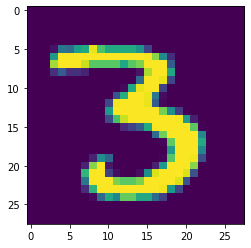

In [ ]:
plt.imshow(img[12])

In [ ]:
#verifiying with target object
y_train[12]

3

**Implementing Artificial Neural Network(ANN)**

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28,28)), #Flatten layer: flattens the input array of 28*28=784 inputs
                                    tf.keras.layers.Dense(128,activation="sigmoid"),#1st hidden layer
                                    tf.keras.layers.Dense(60,activation="sigmoid"),#2nd hidden layer
                                    tf.keras.layers.Dense(10,activation="softmax"),#output layer
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 60)                7740      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                610       
Total params: 108,830
Trainable params: 108,830
Non-trainable params: 0
_________________________________________________________________


**Defining Loss function for a neural network**

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train, batch_size=20,epochs=10)

Epoch 1/10
3000/3000 [==============================] - 5s 2ms/step - loss: 1.6777 - accuracy: 0.8068
Epoch 2/10
3000/3000 [==============================] - 5s 2ms/step - loss: 1.5266 - accuracy: 0.9410
Epoch 3/10
3000/3000 [==============================] - 5s 2ms/step - loss: 1.5076 - accuracy: 0.9584
Epoch 4/10
3000/3000 [==============================] - 5s 2ms/step - loss: 1.4983 - accuracy: 0.9663
Epoch 5/10
3000/3000 [==============================] - 5s 2ms/step - loss: 1.4914 - accuracy: 0.9726
Epoch 6/10
3000/3000 [==============================] - 5s 2ms/step - loss: 1.4865 - accuracy: 0.9773
Epoch 7/10
3000/3000 [==============================] - 5s 2ms/step - loss: 1.4833 - accuracy: 0.9799
Epoch 8/10
3000/3000 [==============================] - 5s 2ms/step - loss: 1.4806 - accuracy: 0.9824
Epoch 9/10
3000/3000 [==============================] - 5s 2ms/step - loss: 1.4783 - accuracy: 0.9846
Epoch 10/10
3000/3000 [==============================] - 5s 2ms/step - loss: 1.476

**Model Evaluation**

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4869 - accuracy: 0.9755


[1.4869431257247925, 0.9754999876022339]

In [ ]:
pred = model.predict(x_test)

In [ ]:
pred.shape

(10000, 10)

In [ ]:
pred[18]

array([2.27171583e-07, 1.18359305e-04, 2.42577540e-03, 9.14930880e-01,
       4.69873982e-07, 2.28621248e-05, 2.19466543e-07, 1.82119857e-05,
       8.24829116e-02, 2.48540815e-08], dtype=float32)

In [ ]:
#converting data into numpy array
img1 = np.array(x_test)

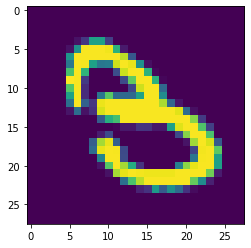

In [ ]:
#picture representation of image
plt.imshow(img1[18])

In [ ]:
#Argmax is a function which returns the position or index of maximum element in the array
pred[18].argmax()

3

prediction says  7 while actual number is 6


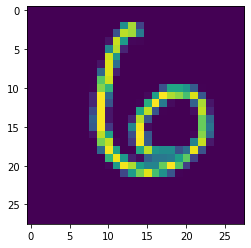

prediction says  2 while actual number is 0


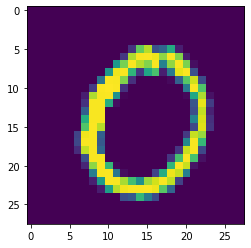

prediction says  1 while actual number is 5


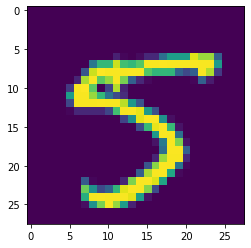

prediction says  0 while actual number is 4


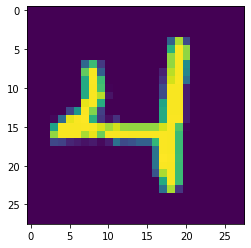

prediction says  4 while actual number is 9


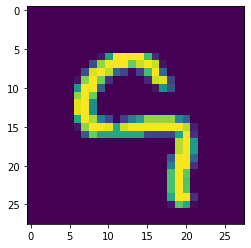

prediction says  1 while actual number is 9


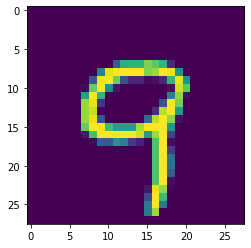

prediction says  4 while actual number is 2


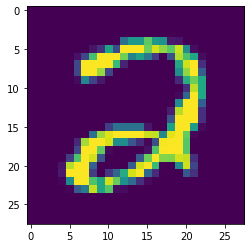

prediction says  9 while actual number is 1


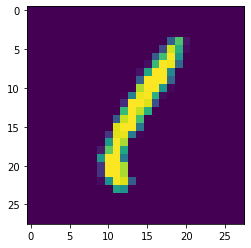

prediction says  5 while actual number is 9


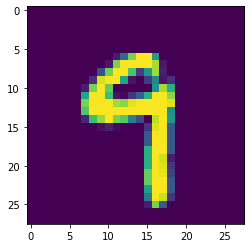

prediction says  9 while actual number is 4


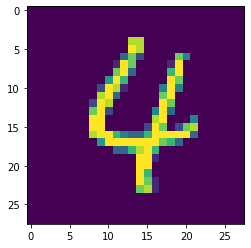

prediction says  0 while actual number is 8


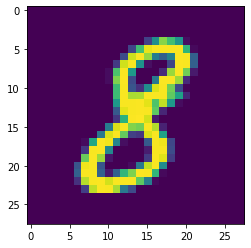

prediction says  6 while actual number is 7


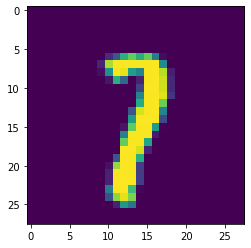

prediction says  9 while actual number is 3


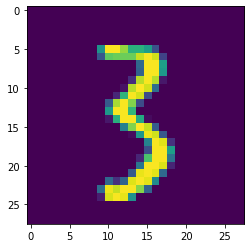

prediction says  0 while actual number is 9


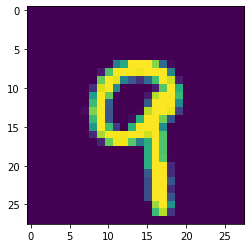

prediction says  1 while actual number is 7


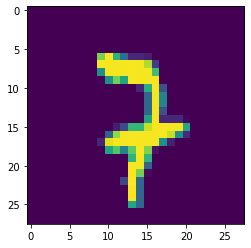

prediction says  5 while actual number is 4


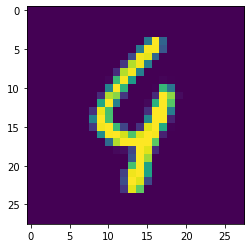

prediction says  9 while actual number is 4


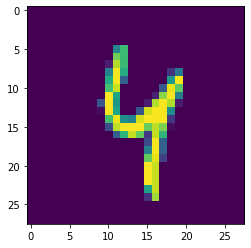

prediction says  7 while actual number is 4


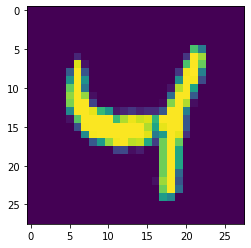

prediction says  3 while actual number is 9


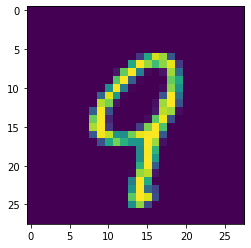

prediction says  4 while actual number is 2


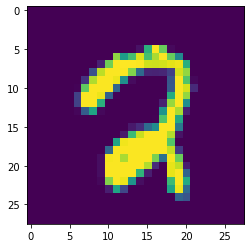

prediction says  9 while actual number is 5


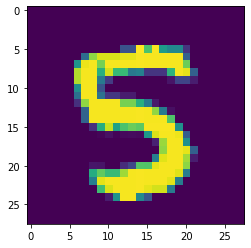

prediction says  6 while actual number is 4


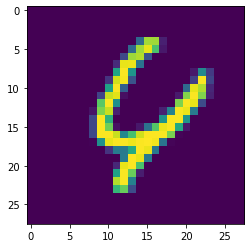

prediction says  6 while actual number is 7


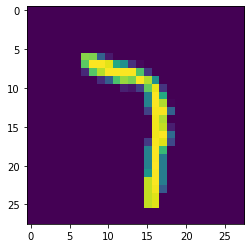

prediction says  5 while actual number is 6


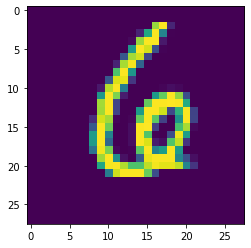

prediction says  4 while actual number is 7


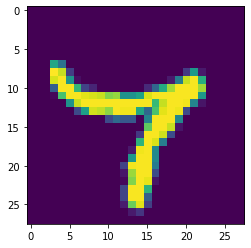

prediction says  0 while actual number is 9


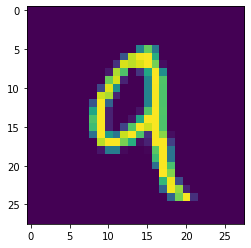

prediction says  7 while actual number is 0


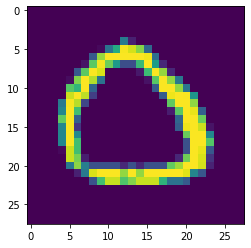

prediction says  4 while actual number is 5


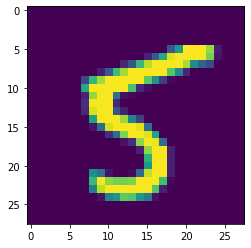

prediction says  0 while actual number is 8


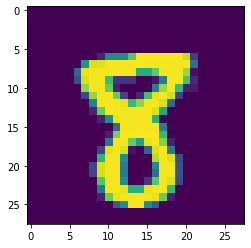

prediction says  1 while actual number is 5


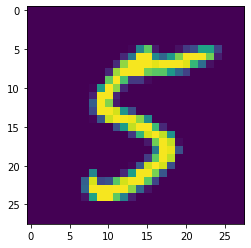

prediction says  3 while actual number is 6


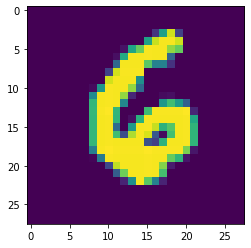

prediction says  1 while actual number is 6


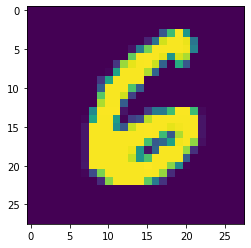

prediction says  3 while actual number is 5


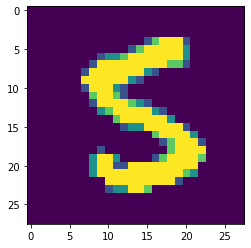

prediction says  4 while actual number is 7


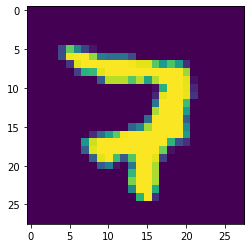

prediction says  7 while actual number is 8


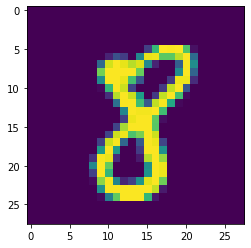

prediction says  2 while actual number is 1


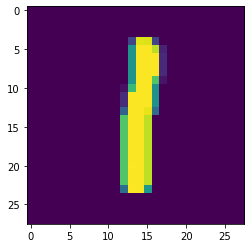

prediction says  7 while actual number is 0


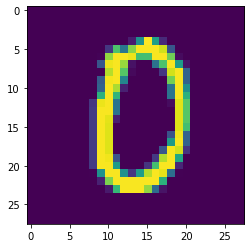

prediction says  2 while actual number is 6


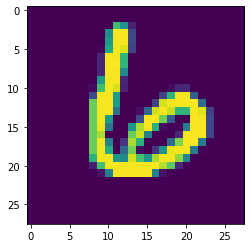

prediction says  1 while actual number is 4


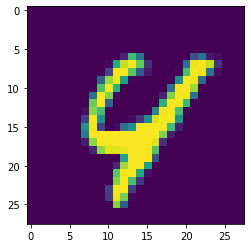

prediction says  1 while actual number is 6


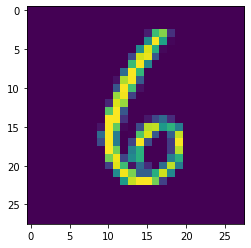

prediction says  4 while actual number is 3


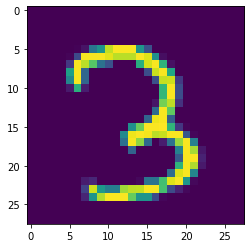

prediction says  2 while actual number is 1


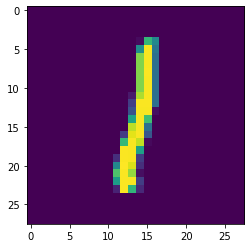

prediction says  3 while actual number is 7


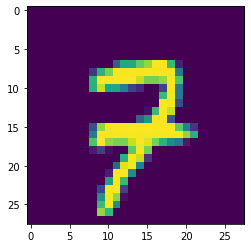

prediction says  5 while actual number is 1


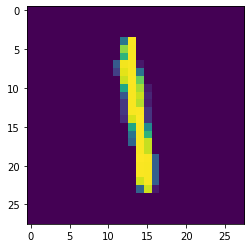

prediction says  1 while actual number is 8


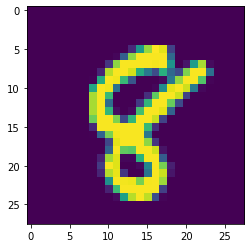

prediction says  4 while actual number is 0


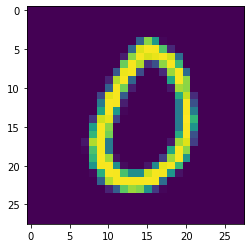

prediction says  4 while actual number is 2


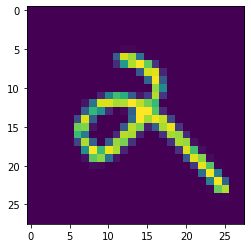

prediction says  6 while actual number is 9


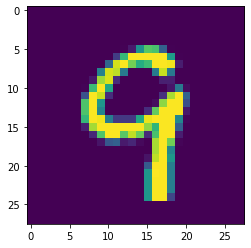

prediction says  3 while actual number is 9


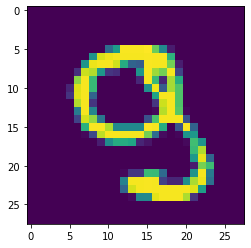

prediction says  6 while actual number is 1


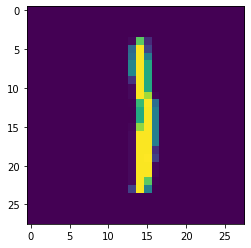

prediction says  0 while actual number is 5


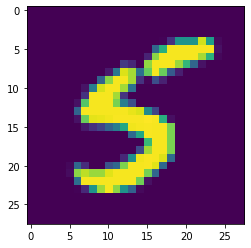

prediction says  4 while actual number is 6


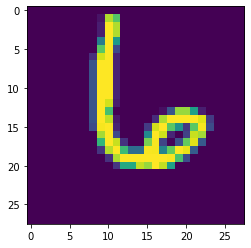

prediction says  1 while actual number is 0


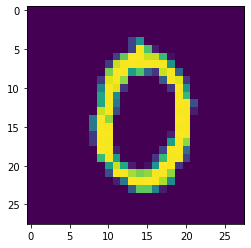

prediction says  9 while actual number is 3


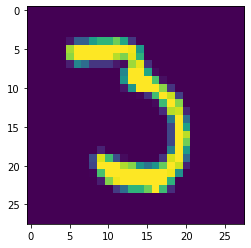

prediction says  5 while actual number is 4


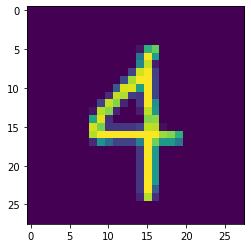

prediction says  7 while actual number is 4


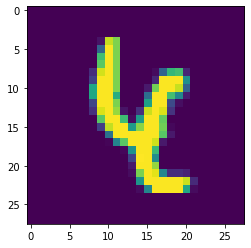

prediction says  8 while actual number is 6


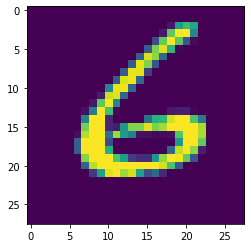

prediction says  9 while actual number is 5


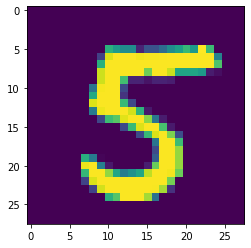

prediction says  3 while actual number is 4


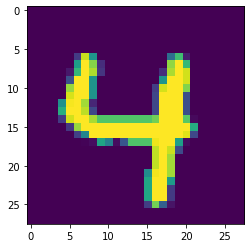

prediction says  7 while actual number is 6


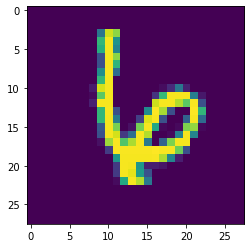

prediction says  4 while actual number is 5


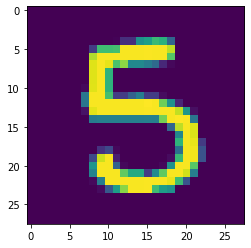

prediction says  6 while actual number is 4


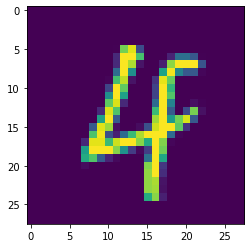

prediction says  4 while actual number is 5


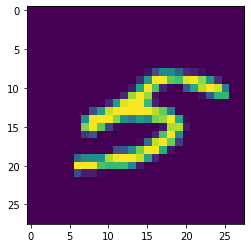

prediction says  3 while actual number is 1


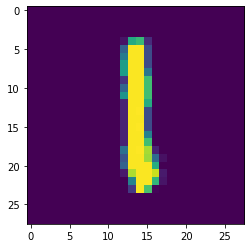

prediction says  0 while actual number is 4


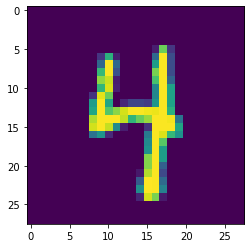

prediction says  7 while actual number is 4


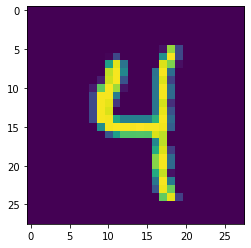

prediction says  0 while actual number is 7


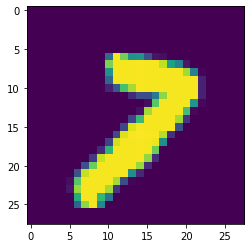

prediction says  9 while actual number is 3


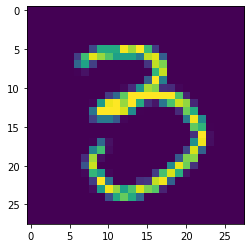

prediction says  1 while actual number is 2


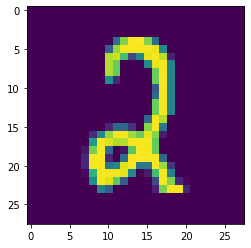

prediction says  3 while actual number is 1


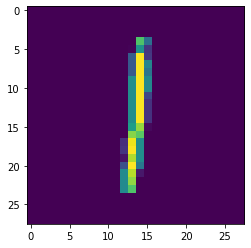

prediction says  2 while actual number is 8


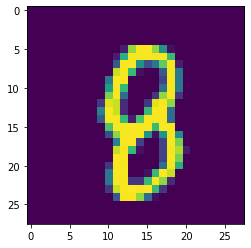

prediction says  9 while actual number is 1


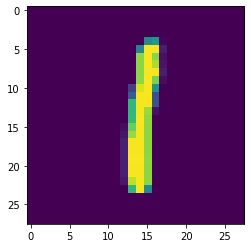

prediction says  7 while actual number is 8


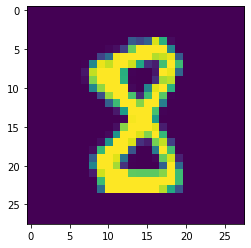

prediction says  7 while actual number is 1


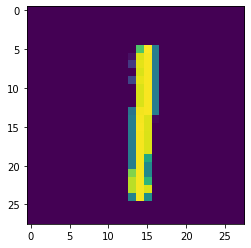

prediction says  6 while actual number is 8


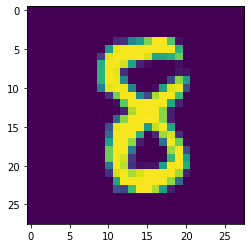

prediction says  2 while actual number is 5


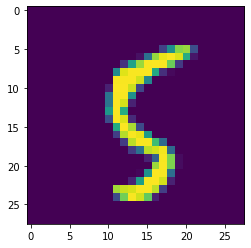

prediction says  7 while actual number is 0


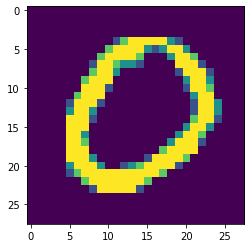

prediction says  4 while actual number is 9


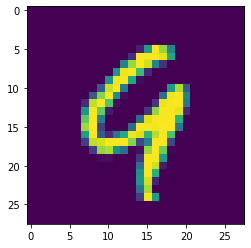

prediction says  7 while actual number is 2


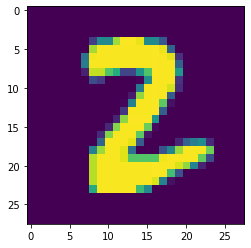

prediction says  3 while actual number is 5


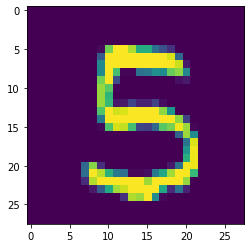

prediction says  6 while actual number is 0


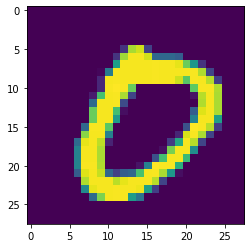

prediction says  3 while actual number is 1


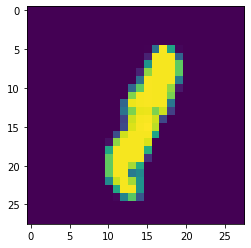

prediction says  6 while actual number is 1


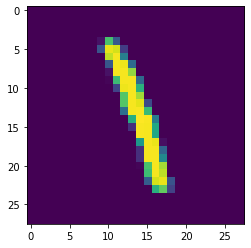

prediction says  9 while actual number is 0


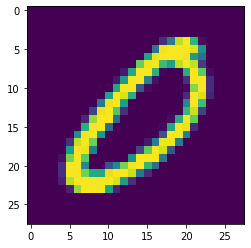

prediction says  3 while actual number is 9


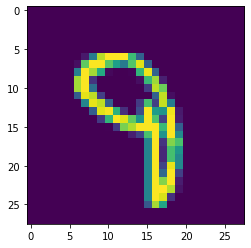

prediction says  1 while actual number is 0


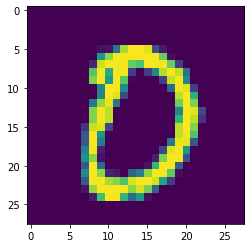

prediction says  4 while actual number is 3


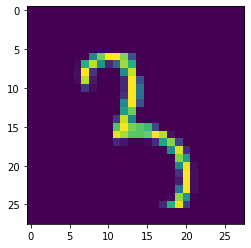

prediction says  7 while actual number is 6


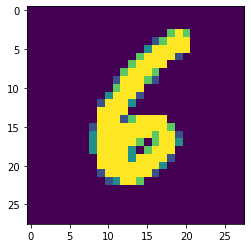

prediction says  6 while actual number is 4


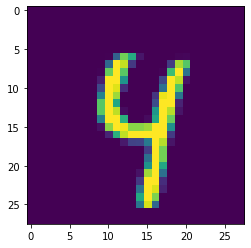

prediction says  9 while actual number is 2


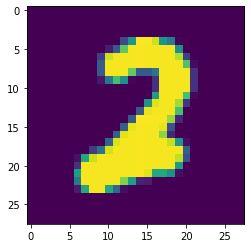

In [ ]:
#function for checking misclassification of images from the data
count=100 #image from 
for i in pred:
  if count <200:
    if i.argmax()!=y_test[count]:
      print('prediction says ',i.argmax(), "while actual number is", y_test[count])
      plt.imshow(img1[count])
      plt.show()
    count = count+1
